In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!gzip "/content/drive/My Drive/TÜ Andmeteadus MSc/Machine Learning I/Project/maindatabase1.csv"

gzip: /content/drive/My Drive/TÜ Andmeteadus MSc/Machine Learning I/Project/maindatabase1.csv: No such file or directory


In [31]:
import matplotlib.pyplot as plt


In [7]:
import pandas as pd
file_path = "/content/drive/My Drive/TÜ Andmeteadus MSc/Machine Learning I/Project/maindatabase1.csv.gz"
chunks = pd.read_csv(file_path, sep=",", chunksize=500000, low_memory=False)
for i, chunk in enumerate(chunks):
    print(f"Chunk {i} loaded, {len(chunk)} rows")
    print(chunk.head())
    break

chunk.head()

Chunk 0 loaded, 500000 rows
                    ts        PtID  GlucoseCGM Database
0  2014-10-01 19:15:00  001_D1NAMO     185.606   D1NAMO
1  2014-10-01 19:20:00  001_D1NAMO     178.398   D1NAMO
2  2014-10-01 19:25:00  001_D1NAMO         NaN   D1NAMO
3  2014-10-01 19:30:00  001_D1NAMO     172.992   D1NAMO
4  2014-10-01 19:35:00  001_D1NAMO     169.388   D1NAMO


,ts,PtID,GlucoseCGM,Database
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO


In [11]:
chunk['date'] = chunk['ts'].dt.date
chunk.head()


,ts,PtID,GlucoseCGM,Database,date
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01


In [13]:
chunk = chunk.sort_values(['PtID', 'date'])
chunk.head()

,ts,PtID,GlucoseCGM,Database,date
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01


In [19]:
# Arvuta ajavahe järjestikuste mõõtmiste vahel
chunk['date'] = pd.to_datetime(chunk['date'])
chunk['delta_min'] = chunk.groupby('PtID')['ts'].diff().dt.total_seconds() / 60

#  Kontrolli tüüpilist sammu
chunk['delta_min'].describe()


,delta_min
count,499984.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [16]:
chunk['GlucoseCGM'].isna().sum()

chunk['CGM_interp'] = chunk.groupby('PtID')['GlucoseCGM'].transform(lambda x: x.interpolate(limit=3))

print(chunk['GlucoseCGM'].isna().sum())
print(chunk['GlucoseCGM'].describe())


204096
count    295904.000000
mean        178.298256
std          78.082781
min          39.000000
25%         119.000000
50%         164.000000
75%         224.000000
max         447.000000
Name: GlucoseCGM, dtype: float64


In [20]:
chunk.head()

,ts,PtID,GlucoseCGM,Database,date,delta_min,CGM_interp
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01,NaN,185.606
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01,5.0,178.398
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,175.695
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01,5.0,172.992
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01,5.0,169.388


In [66]:
chunk['PtID'].unique()

array(['001_D1NAMO', '002_D1NAMO', '003_D1NAMO', '004_D1NAMO',
       '005_D1NAMO', '006_D1NAMO', '007_D1NAMO', '008_D1NAMO',
       '009_D1NAMO', '1.0_CITY', '1.0_DLCP3', '1.0_PEDAP', '1.0_RT-CGM',
       '1.0_SENCE', '1.0_SHD', '10.0_CITY'], dtype=object)

In [23]:
# Teisendus mg/dL → mmol/L
chunk['CGM_mmol'] = chunk['GlucoseCGM'] / 18

# Märgi, kas väärtus on vahemikus 4–10 mmol/L
chunk['in_range'] = chunk['CGM_mmol'].between(4, 10)
chunk.head()

,ts,PtID,GlucoseCGM,Database,date,delta_min,CGM_interp,CGM_mmol,in_range
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01,NaN,185.606,10.311444,False
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01,5.0,178.398,9.911000,True
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,175.695,NaN,False
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01,5.0,172.992,9.610667,True
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01,5.0,169.388,9.410444,True


In [25]:
chunk.head(104)

,ts,PtID,GlucoseCGM,Database,date,delta_min,CGM_interp,CGM_mmol,in_range
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01,NaN,185.606,10.311444,False
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01,5.0,178.398,9.911000,True
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,175.695,NaN,False
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01,5.0,172.992,9.610667,True
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01,5.0,169.388,9.410444,True
...,...,...,...,...,...,...,...,...,...
99,2014-10-02 03:30:00,001_D1NAMO,178.398,D1NAMO,2014-10-02,5.0,178.398,9.911000,True
100,2014-10-02 03:35:00,001_D1NAMO,174.794,D1NAMO,2014-10-02,5.0,174.794,9.710778,True
101,2014-10-02 03:40:00,001_D1NAMO,171.190,D1NAMO,2014-10-02,5.0,171.190,9.510556,True
102,2014-10-02 03:45:00,001_D1NAMO,167.586,D1NAMO,2014-10-02,5.0,167.586,9.310333,True


In [42]:
pt = "001"
subset = chunk[chunk['PtID'] == pt+"_D1NAMO"]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 001 Time in Range: 46.1%


In [43]:
subset.head()

,ts,PtID,GlucoseCGM,Database,date,delta_min,CGM_interp,CGM_mmol,in_range
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01,NaN,185.606,10.311444,False
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01,5.0,178.398,9.911000,True
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,175.695,NaN,False
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01,5.0,172.992,9.610667,True
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01,5.0,169.388,9.410444,True


In [58]:
pt = "0010"
subset = chunk[chunk['PtID'] == pt+"_D1NAMO"]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 0010 Time in Range: nan%


In [57]:
subset.head()

,ts,PtID,GlucoseCGM,Database,date,delta_min,CGM_interp,CGM_mmol,in_range


Patsiendil 010_D1NAMO pole andmeid vahemikus 2014-10-01-2014-10-12.
Series([], Name: is_low, dtype: float64)


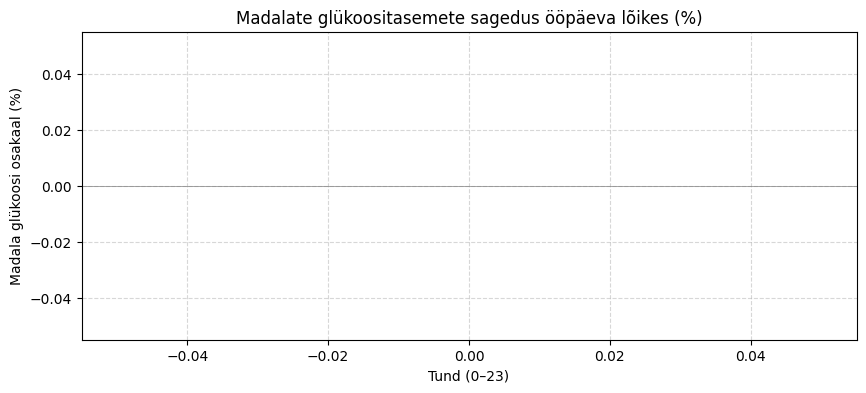

In [54]:
#sisesta patsiendi id
pt = "010_D1NAMO"

chunk['date'] = pd.to_datetime(chunk['date'], format='%Y-%m-%d %H:%M:%S')

#sisesta kuupäeva vahemik millal tahad tulemusi vaadata
start_date = '2014-10-01'
end_date = '2014-10-12'

#teeme subseti, kus võtame patseindi id ja kuupäevade järgi andmed
subset = chunk[
    (chunk['PtID'] == pt) &
    (chunk['date'].between(start_date, end_date))
].copy()

#arvutused
subset['CGM_mmol'] = subset['GlucoseCGM'] / 18
subset['date'] = subset['ts'].dt.date
subset['hour'] = subset['ts'].dt.hour
subset['minute'] = subset['ts'].dt.minute
subset['time_of_day'] = subset['hour'] + subset['minute']/60
subset['is_low'] = subset['GlucoseCGM'] < 70  # või subset['CGM_mmol'] < 3.9


if subset.empty:
    print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}-{end_date}.")
else:
  plt.figure(figsize=(12,5))

  # toonitud tsoonid (70–180 mg/dL norm vahemik)
  plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

  # joon
  plt.plot(subset['ts'], subset['GlucoseCGM'], color='blue', label='Glükoos (mg/dL)')

  # punased punktid: liiga kõrge
  plt.scatter(subset['ts'][subset['GlucoseCGM'] > 180],
              subset['GlucoseCGM'][subset['GlucoseCGM'] > 180],
              color='red', s=20, label='Üle 180 mg/dL')

  # oranžid punktid: liiga madal
  plt.scatter(subset['ts'][subset['GlucoseCGM'] < 70],
              subset['GlucoseCGM'][subset['GlucoseCGM'] < 70],
              color='orange', s=20, label='Alla 70 mg/dL')

  plt.title(f'Patsiendi {pt} glükoositase')
  plt.xlabel('Aeg')
  plt.ylabel('Glükoos (mg/dL)')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.4)
  plt.show()

# mitu korda tunnis on väärtus madal
hourly_low = (
    subset.groupby('hour')['is_low']
    .mean() * 100  # protsent tunnis
)
print(hourly_low)

plt.figure(figsize=(10,4))
plt.plot(hourly_low.index, hourly_low.values, marker='o')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Madalate glükoositasemete sagedus ööpäeva lõikes (%)')
plt.xlabel('Tund (0–23)')
plt.ylabel('Madala glükoosi osakaal (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [27]:
pt = "002"
subset = chunk[chunk['PtID'] == pt+"_D1NAMO"]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 002 Time in Range: 31.6%


In [29]:
pt = "009"
subset = chunk[chunk['PtID'] == pt+"_D1NAMO"]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 009 Time in Range: 4.2%


In [36]:
subset.head()

,ts,PtID,GlucoseCGM,Database,date,delta_min,CGM_interp,CGM_mmol,in_range
8137,2014-10-01 06:00:00,009_D1NAMO,NaN,D1NAMO,2014-10-01,NaN,NaN,NaN,False
8138,2014-10-01 06:05:00,009_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,NaN,NaN,False
8139,2014-10-01 06:10:00,009_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,NaN,NaN,False
8140,2014-10-01 06:15:00,009_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,NaN,NaN,False
8141,2014-10-01 06:20:00,009_D1NAMO,NaN,D1NAMO,2014-10-01,5.0,NaN,NaN,False


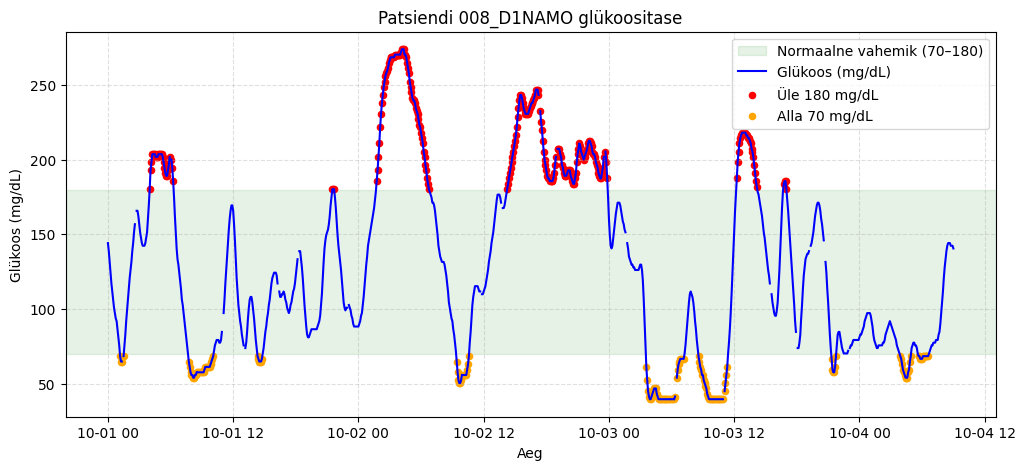

hour
0      0.000000
1      8.333333
2      0.000000
3     12.500000
4     50.000000
5     31.250000
6     37.500000
7     12.500000
8     33.333333
9     83.783784
10    58.333333
11    11.111111
12     0.000000
13     0.000000
14    16.666667
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21    16.666667
22     0.000000
23     0.000000
Name: is_low, dtype: float64


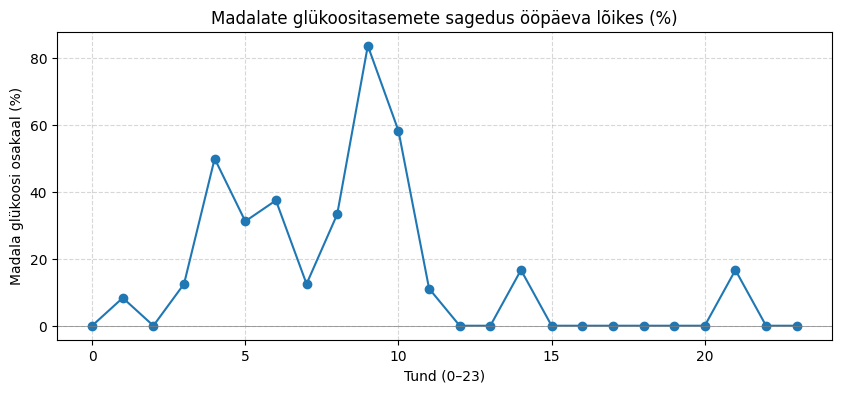

In [49]:
#sisesta patsiendi id
pt = "008_D1NAMO"

chunk['date'] = pd.to_datetime(chunk['date'], format='%Y-%m-%d %H:%M:%S')

#sisesta kuupäeva vahemik millal tahad tulemusi vaadata
start_date = '2014-10-01'
end_date = '2014-10-12'

#teeme subseti, kus võtame patseindi id ja kuupäevade järgi andmed
subset = chunk[
    (chunk['PtID'] == pt) &
    (chunk['date'].between(start_date, end_date))
].copy()

#arvutused
subset['CGM_mmol'] = subset['GlucoseCGM'] / 18
subset['date'] = subset['ts'].dt.date
subset['hour'] = subset['ts'].dt.hour
subset['minute'] = subset['ts'].dt.minute
subset['time_of_day'] = subset['hour'] + subset['minute']/60
subset['is_low'] = subset['GlucoseCGM'] < 70  # või subset['CGM_mmol'] < 3.9


if subset.empty:
    print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}-{end_date}.")
else:
  plt.figure(figsize=(12,5))

  # toonitud tsoonid (70–180 mg/dL norm vahemik)
  plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

  # joon
  plt.plot(subset['ts'], subset['GlucoseCGM'], color='blue', label='Glükoos (mg/dL)')

  # punased punktid: liiga kõrge
  plt.scatter(subset['ts'][subset['GlucoseCGM'] > 180],
              subset['GlucoseCGM'][subset['GlucoseCGM'] > 180],
              color='red', s=20, label='Üle 180 mg/dL')

  # oranžid punktid: liiga madal
  plt.scatter(subset['ts'][subset['GlucoseCGM'] < 70],
              subset['GlucoseCGM'][subset['GlucoseCGM'] < 70],
              color='orange', s=20, label='Alla 70 mg/dL')

  plt.title(f'Patsiendi {pt} glükoositase')
  plt.xlabel('Aeg')
  plt.ylabel('Glükoos (mg/dL)')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.4)
  plt.show()

# mitu korda tunnis on väärtus madal
hourly_low = (
    subset.groupby('hour')['is_low']
    .mean() * 100  # protsent tunnis
)
print(hourly_low)

plt.figure(figsize=(10,4))
plt.plot(hourly_low.index, hourly_low.values, marker='o')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Madalate glükoositasemete sagedus ööpäeva lõikes (%)')
plt.xlabel('Tund (0–23)')
plt.ylabel('Madala glükoosi osakaal (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

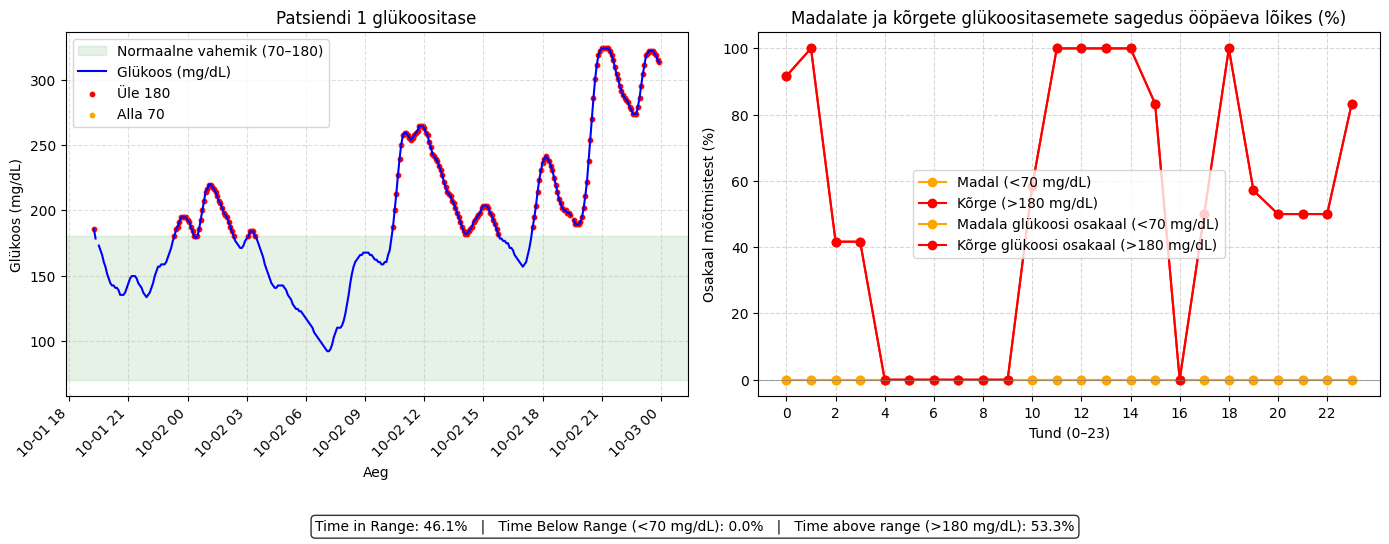

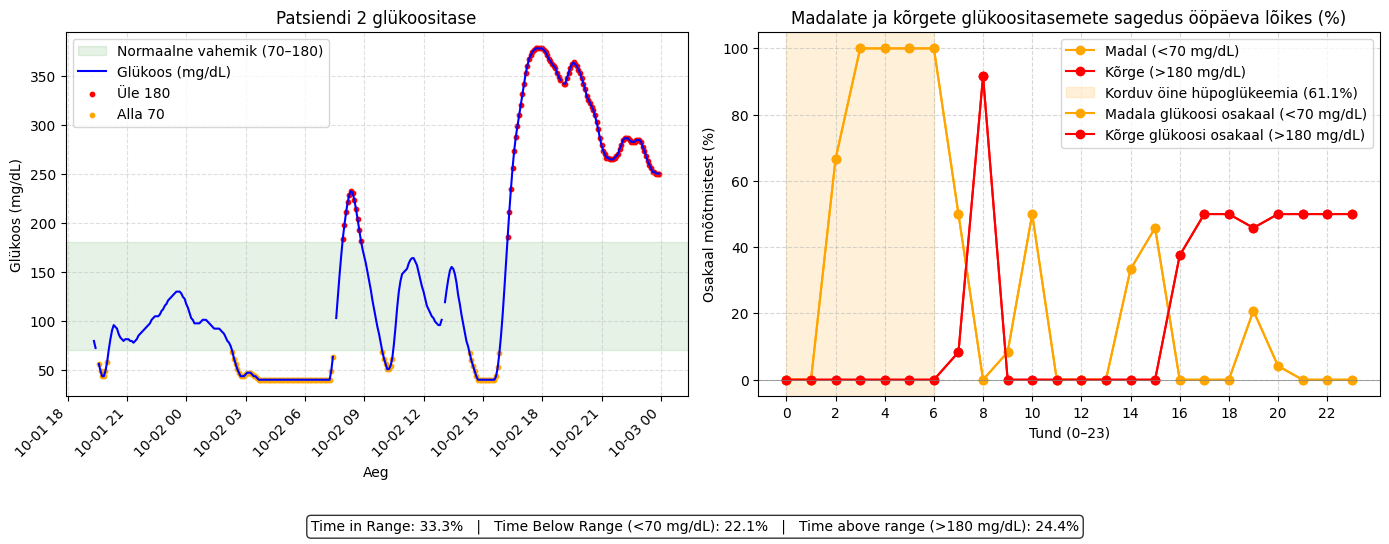

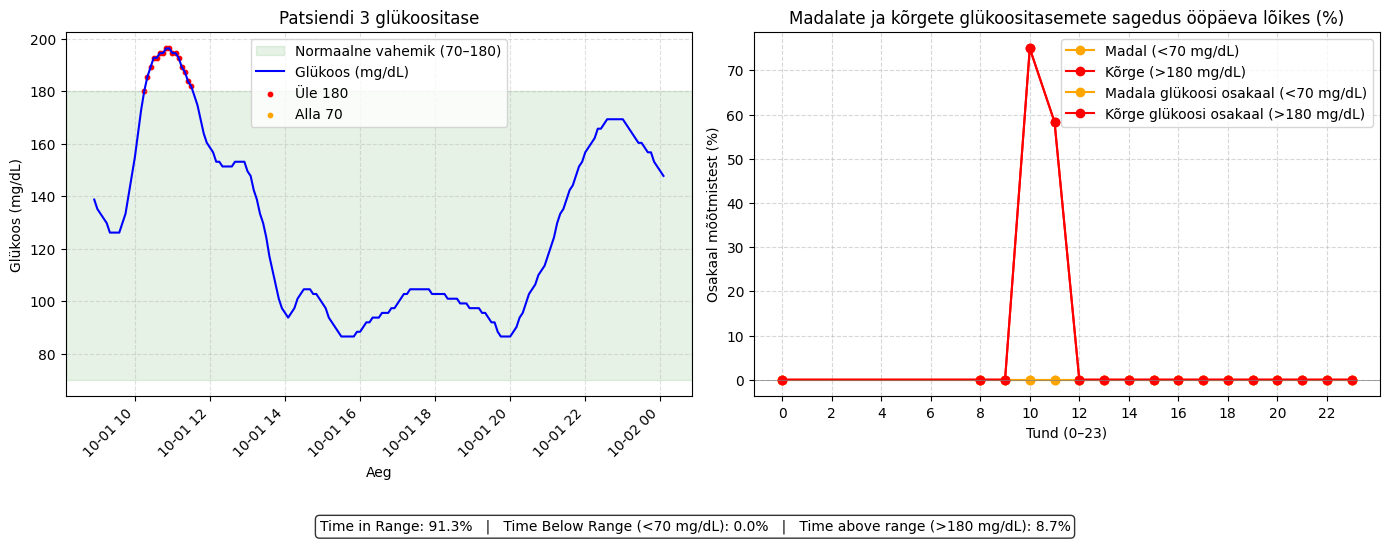

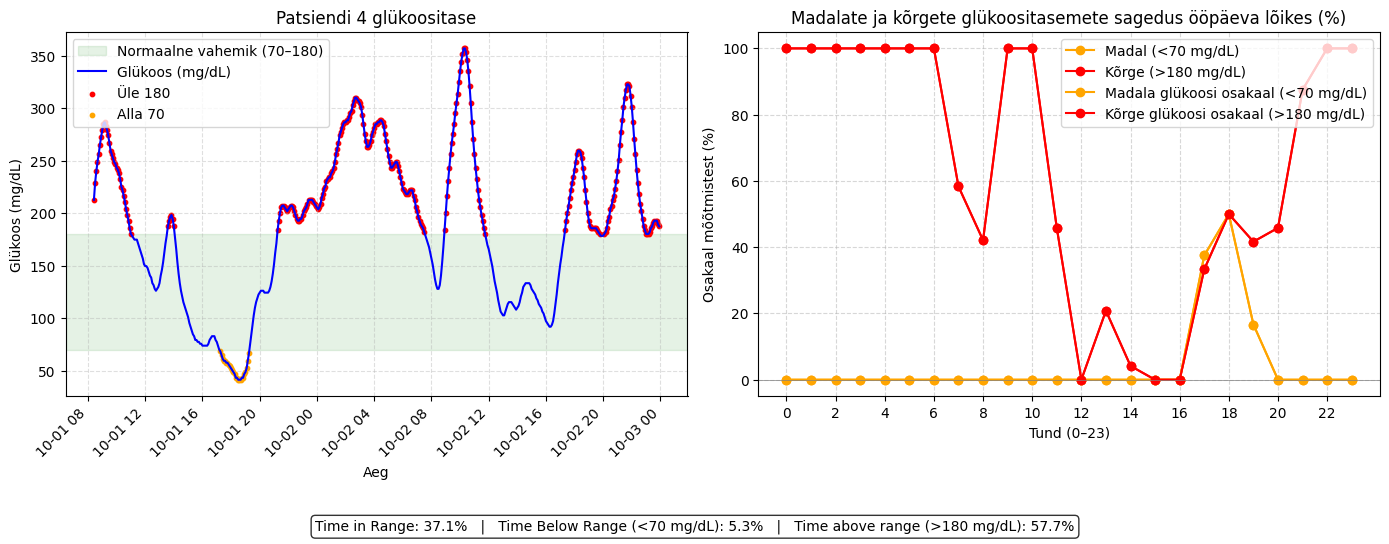

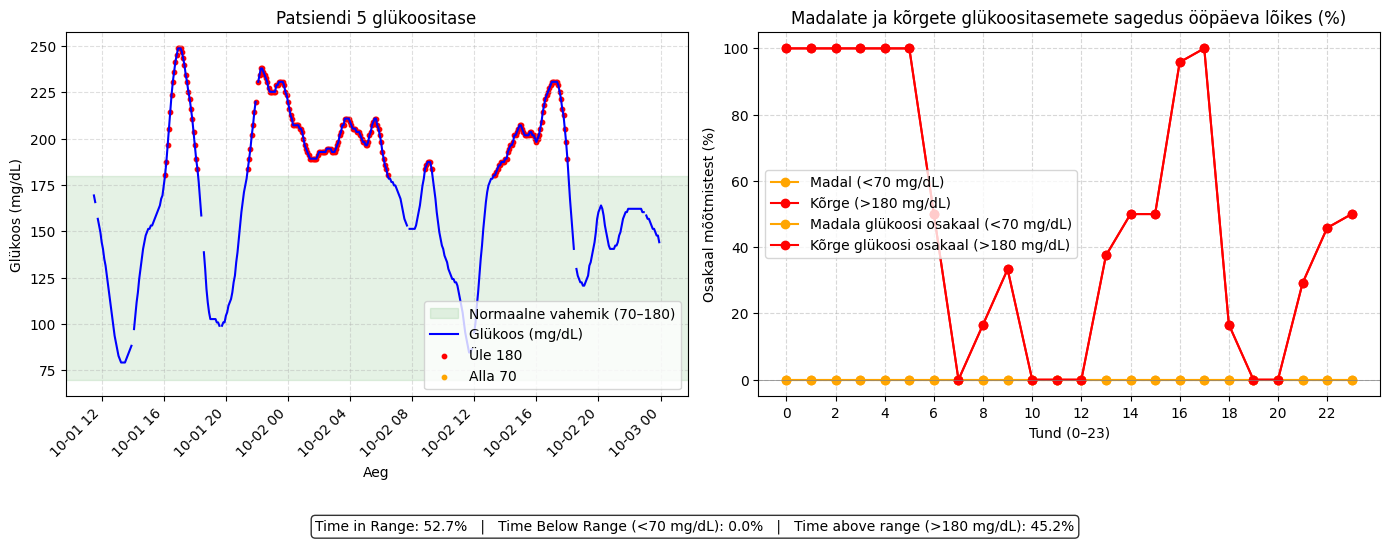

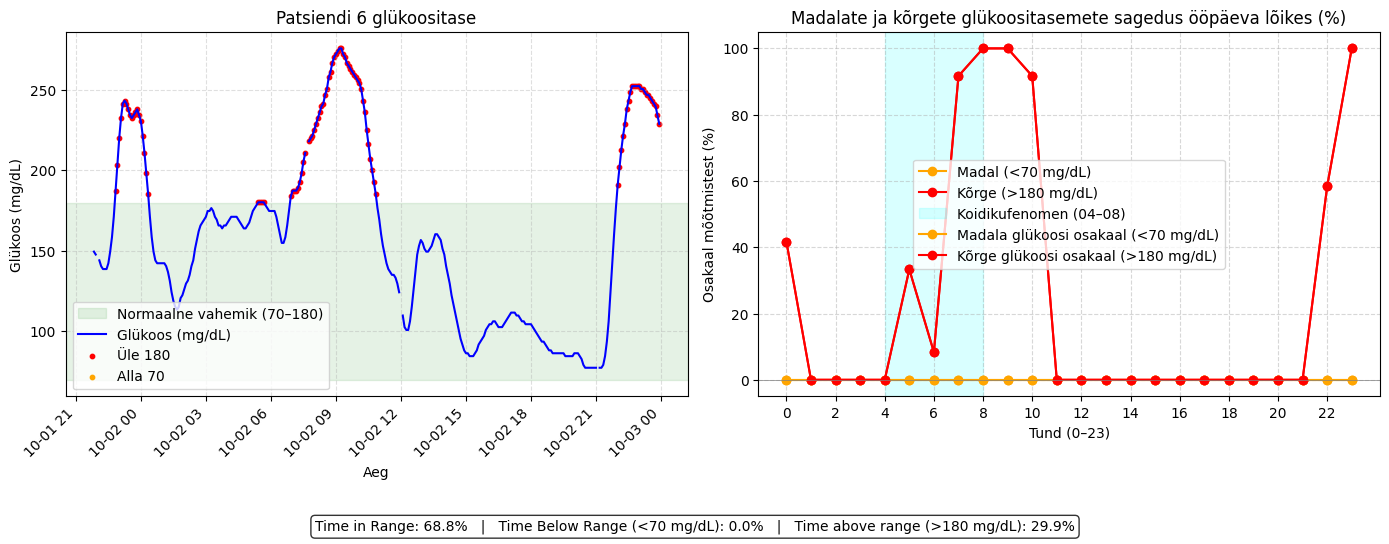

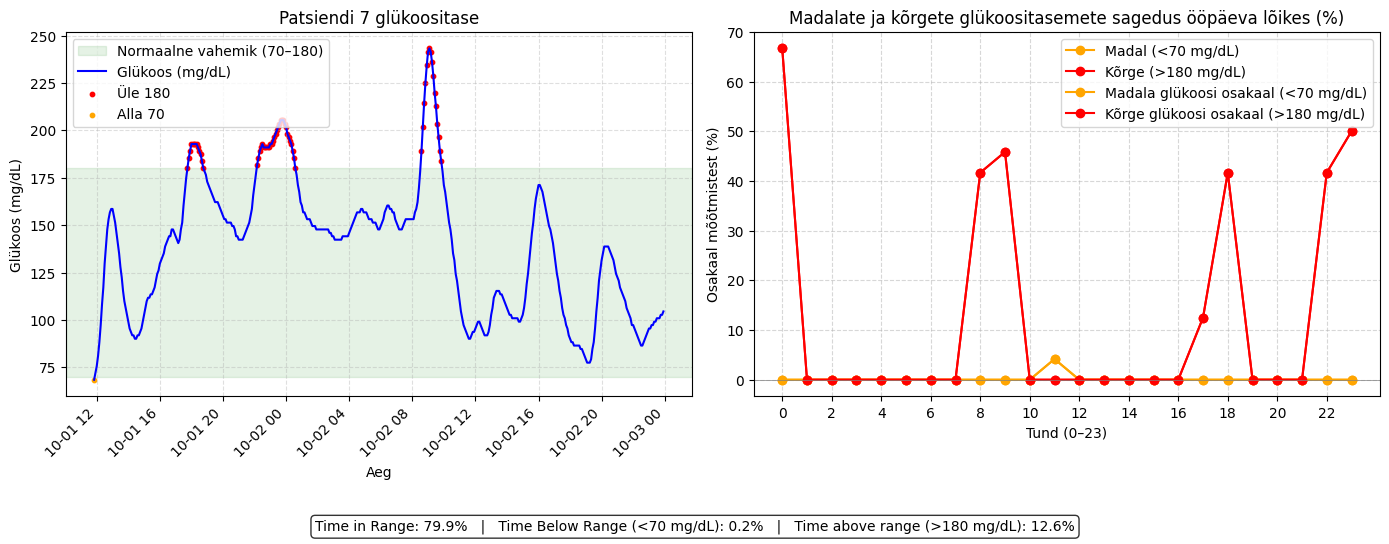

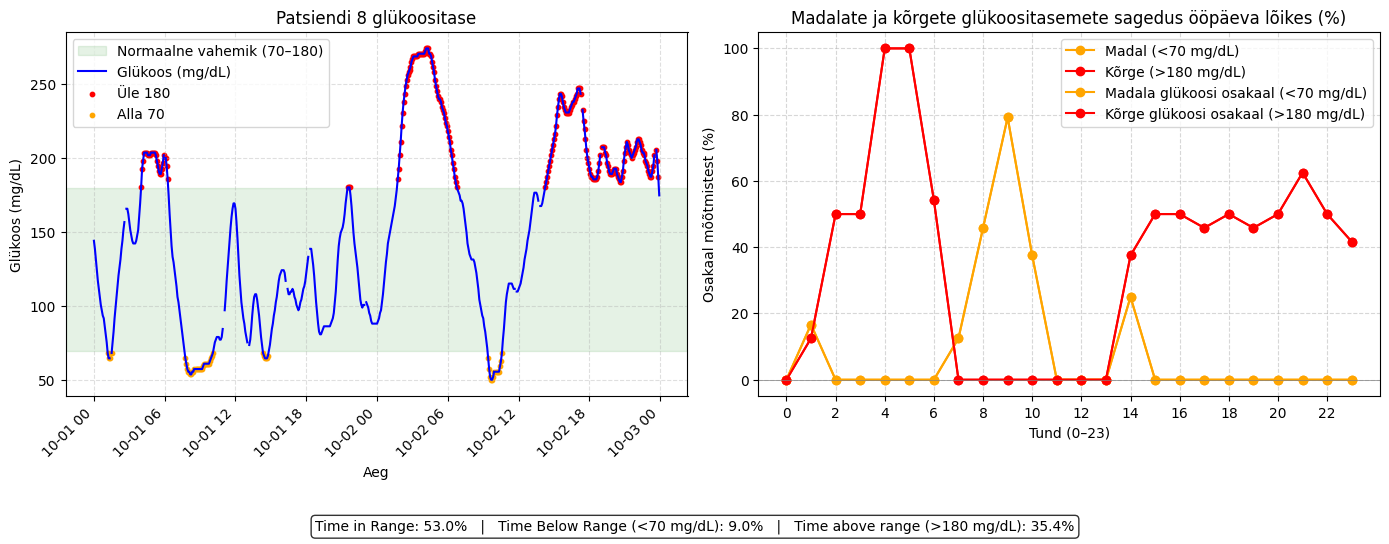

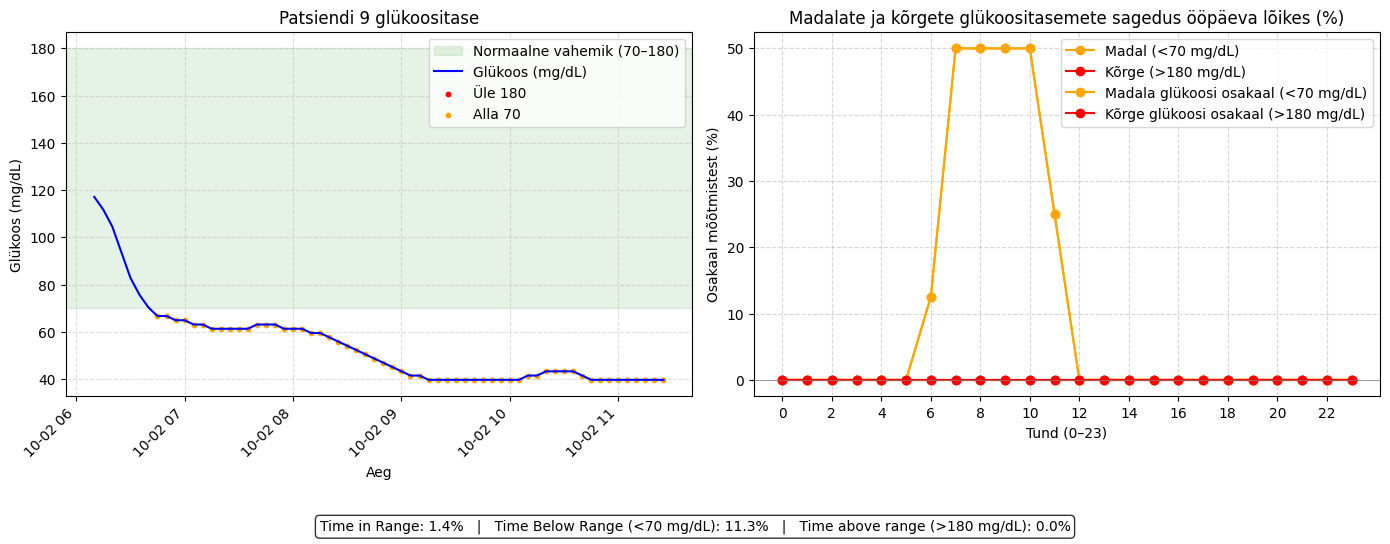

In [68]:
#määra start date
start_date = '2014-10-01'
end_date = '2014-10-02'

for pt in range(1, 10):  # patsiendid 1–15
    # vali patsiendi ja kuupäeva vahemiku andmed
    subset = chunk[
        (chunk['PtID'] == "00" + str(pt) + "_D1NAMO") &
        (chunk['date'].between(start_date, end_date))
    ].copy()

    if subset.empty:
        print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}-{end_date}.")
        continue

    # arvutused
    subset['CGM_mmol'] = subset['GlucoseCGM'] / 18
    subset['hour'] = subset['ts'].dt.hour
    subset['is_low'] = subset['GlucoseCGM'] < 70

    # mitu korda tunnis on väärtus madal
    hourly_low = subset.groupby('hour')['is_low'].mean() * 100

    # --- joonis kahe alamgraafikuga ---
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # Vasak: glükoositrend ajas
    ax1 = axes[0]
    ax1.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')
    ax1.plot(subset['ts'], subset['GlucoseCGM'], color='blue', label='Glükoos (mg/dL)')
    ax1.scatter(subset['ts'][subset['GlucoseCGM'] > 180], subset['GlucoseCGM'][subset['GlucoseCGM'] > 180],
                color='red', s=10, label='Üle 180')
    ax1.scatter(subset['ts'][subset['GlucoseCGM'] < 70], subset['GlucoseCGM'][subset['GlucoseCGM'] < 70],
                color='orange', s=10, label='Alla 70')
    ax1.set_title(f'Patsiendi {pt} glükoositase')
    ax1.set_xlabel('Aeg')
    ax1.set_ylabel('Glükoos (mg/dL)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.4)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')


    TIR = (subset['GlucoseCGM'].between(70,180)).mean() * 100
    TBR = (subset['GlucoseCGM'] < 70).mean() * 100
    TAR = (subset['GlucoseCGM'] > 180).mean() * 100
    # Lisa tekst kogu joonise alla (fig tasemel)
    fig.text(0.5, -0.05,
            f"Time in Range: {TIR:.1f}%   |   Time Below Range (<70 mg/dL): {TBR:.1f}%   |   Time above range (>180 mg/dL): {TAR:.1f}%",
            ha='center', va='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


    ax2 = axes[1]
    # tunnipõhised sagedused (%)
    hourly_low = subset.groupby('hour')['GlucoseCGM'].apply(lambda x: (x < 70).mean() * 100)
    hourly_high = subset.groupby('hour')['GlucoseCGM'].apply(lambda x: (x > 180).mean() * 100)

    # jooned
    ax2.plot(hourly_low.index, hourly_low.values, marker='o', color='orange', label='Madal (<70 mg/dL)')
    ax2.plot(hourly_high.index, hourly_high.values, marker='o', color='red', label='Kõrge (>180 mg/dL)')

    # Korduv öine hüpoglükeemia (00–06)
    night_hours = range(0, 6)
    night_low_freq = hourly_low[hourly_low.index.isin(night_hours)].mean()
    if night_low_freq > 10:  # nt kui >10% mõõtmistest on madalad öösel
        ax2.axvspan(0, 6, color='orange', alpha=0.15,
                    label=f'Korduv öine hüpoglükeemia ({night_low_freq:.1f}%)')

    # Koidikufenomen (04–08 tõus)
    mean_before = subset[(subset['hour']>=0) & (subset['hour']<4)]['GlucoseCGM'].mean()
    mean_after  = subset[(subset['hour']>=4) & (subset['hour']<=8)]['GlucoseCGM'].mean()
    if mean_after - mean_before > 20:  # tõus vähemalt 20 mg/dL (≈1.1 mmol/L)
        ax2.axvspan(4, 8, color='cyan', alpha=0.15, label='Koidikufenomen (04–08)')

    # arvutame ka kõrgete väärtuste (TAR) protsendi tunnis
    hourly_high = subset.groupby('hour')['GlucoseCGM'].apply(lambda x: (x > 180).mean() * 100)

    # joonista mõlemad
    ax2.plot(hourly_low.index, hourly_low.values, marker='o', color='orange', label='Madala glükoosi osakaal (<70 mg/dL)')
    ax2.plot(hourly_high.index, hourly_high.values, marker='o', color='red', label='Kõrge glükoosi osakaal (>180 mg/dL)')

    # lisa abijoon
    ax2.axhline(0, color='gray', linewidth=0.5)

    # sätted
    ax2.set_title('Madalate ja kõrgete glükoositasemete sagedus ööpäeva lõikes (%)')
    ax2.set_xlabel('Tund (0–23)')
    ax2.set_ylabel('Osakaal mõõtmistest (%)')
    ax2.set_xticks(range(0,24,2))
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.legend()



    plt.tight_layout()
    plt.show()
    print()
